# 🏘 AirBnb Lisbon Analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
from IPython.display import Image
%matplotlib inline

In [2]:
df_original = pd.read_csv("http://data.insideairbnb.com/portugal/lisbon/lisbon/2021-07-10/visualisations/listings.csv")
df = df_original.copy()
df.sample(3)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
9869,25761249,Five Bedroom Apartment @ Bairro Alto (Entire F...,193312870,Sweet,Lisboa,Misericrdia,38.70974,-9.15252,Entire home/apt,84,3,1,2018-07-31,0.03,2,197
6383,18430259,Casa Lameiras | Private Room and Bathroom,57853651,José,Mafra,Mafra,38.96036,-9.34857,Private room,60,2,1,2017-07-19,0.02,3,364
19073,50286848,Casinha Peral,356338426,Residence & Confidence,Cadaval,Peral,39.25716,-9.07846,Entire home/apt,40,3,0,NaN,NaN,1,151


# Cleaning Data

### Once we have all the data, we can delete the columns that are not related to the initial questions. We save the DataFrame as a copy in a new variable in case it is necessary to retrieve some deleted data.

In [3]:
df.drop(df[['name', 'host_id', 'host_name', 'last_review', 'reviews_per_month', 'calculated_host_listings_count']], axis=1, inplace=True)

In [4]:
df.describe()

,id,latitude,longitude,price,minimum_nights,number_of_reviews,availability_365
count,1.945800e+04,19458.000000,19458.000000,19458.000000,19458.000000,19458.000000,19458.000000
mean,2.575751e+07,38.760463,-9.207214,108.296022,3.850396,42.815860,218.978878
std,1.433946e+07,0.111480,0.113342,281.433465,16.737444,69.092684,125.645147
min,6.499000e+03,38.676620,-9.498520,0.000000,1.000000,0.000000,0.000000
25%,1.450468e+07,38.710950,-9.274187,50.000000,1.000000,1.000000,113.000000
50%,2.534503e+07,38.717765,-9.147140,72.000000,2.000000,12.000000,251.000000
75%,3.747553e+07,38.741595,-9.134963,110.000000,3.000000,55.000000,335.000000
max,5.093921e+07,39.297840,-8.840090,20628.000000,1000.000000,1294.000000,365.000000


### Analyzing the data above, some problems already appear, such as the large variance between the minimum, maximum and average values. But, before proceeding with the analysis, we have to analyze what percentage of data is missing.

In [5]:
df.isnull().sum() 

id                     0
neighbourhood_group    0
neighbourhood          0
latitude               0
longitude              0
room_type              0
price                  0
minimum_nights         0
number_of_reviews      0
availability_365       0
dtype: int64

### Lucky or not, there are no missing values. Thus, we can analyze our two main columns: "price" and "minimum_nights". To do so, let's isolate them in a new variable for easier manipulation.

In [6]:
df_price_and_nights = df[['price', 'minimum_nights']].copy()
df_price_and_nights.shape

(19458, 2)

In [7]:
df_price_and_nights.describe()

,price,minimum_nights
count,19458.000000,19458.000000
mean,108.296022,3.850396
std,281.433465,16.737444
min,0.000000,1.000000
25%,50.000000,1.000000
50%,72.000000,2.000000
75%,110.000000,3.000000
max,20628.000000,1000.000000


### As stated before, for the two columns the values appear with a large discrepancy, which indicates the existence of outliers. In the case of "minimum_nights" for example, the fourth quartile starts with a minimum of three nights, with a maximum value of one thousand. Likewise, the "price" column third quartile ends with 110 euros and the maximum value is greater than two thousand euros. In this case, let's make a boxchart, ideal to visual indicate the existence of outliers.

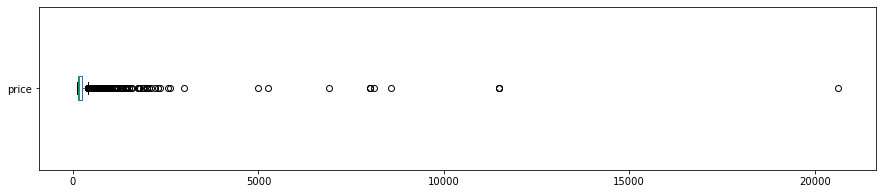

Price: price above 110 euros
4845 entries
24.8998% of the entire DataSet


In [8]:
df_price_above_110 = df_price_and_nights[df_price_and_nights['price'] > 110]
df_price_above_110['price'].plot(kind='box', vert=False, figsize=(15, 3))
plt.show()

print("Price: price above 110 euros")
print(f"{len(df_price_above_110['price'])} entries")
print(f"{len(df_price_above_110['price']) / df_price_and_nights.shape[0]*100:.4f}% of the entire DataSet")

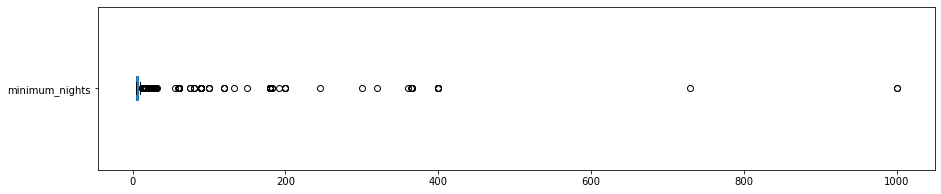

minimum_nights: values above 3 days:
3355 entries
17.2423% of the entire DataSet


In [9]:
df_nights_more_than_three = df_price_and_nights[df_price_and_nights['minimum_nights'] > 3]
df_nights_more_than_three['minimum_nights'].plot(kind='box', vert=False, figsize=(15, 3))
plt.show()

print("minimum_nights: values above 3 days:")
print(f"{len(df_nights_more_than_three['minimum_nights'])} entries")
print(f"{len(df_nights_more_than_three['minimum_nights']) / df_price_and_nights.shape[0]*100:.4f}% of the entire DataSet")

### Suspicions are confirmed, there are outliers. To clear the data, we will use a technique known as "Z-Score" or "Standard score"

### In Statistics, for Gaussian distribution, the standard score is the number of standard deviations by which the value of a raw score is above or below the mean value of what is being observed.

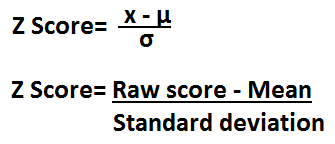

In [11]:
Image(filename='zscore.png') 

### For each column, we will compute the Z-score of each value in that column, relative to the column mean and the standard deviation. After that, we will take the absolute value, because the direction of the standard deviation does not matter. Finally, we will limit a value of three standard deviations.

In [12]:
df_clean = df[(np.abs(stats.zscore(df[['price','minimum_nights']])) < 3).all(axis=1)]

In [13]:
len(df) - len(df_clean)

166

### With data cleaning, we removed 166 rows from the DataFrame.

# Question 1 - What is the average rental price and the minimum number of nights needed in Lisbon? 

### As seen below, now the data makes more sense, where the minimum number of nights is closer to the logical standard of a month.

### Answering our question, for the district of Lisbon, the average price of a night is €94, with €110 representing all prices up to the end of the third quartile. Regarding the minimum number of nights, the average number is three nights.

In [14]:
df_clean.describe()

,id,latitude,longitude,price,minimum_nights,number_of_reviews,availability_365
count,1.929200e+04,19292.000000,19292.000000,19292.000000,19292.000000,19292.000000,19292.000000
mean,2.574080e+07,38.760468,-9.207102,97.908667,3.105018,43.009589,218.940234
std,1.433528e+07,0.111532,0.113301,94.174875,4.240632,69.207577,125.471516
min,6.499000e+03,38.676620,-9.498520,0.000000,1.000000,0.000000,0.000000
25%,1.450265e+07,38.710950,-9.271970,50.000000,1.000000,1.000000,113.000000
50%,2.532241e+07,38.717715,-9.147110,72.000000,2.000000,12.000000,251.000000
75%,3.741547e+07,38.741450,-9.134960,110.000000,3.000000,55.000000,334.000000
max,5.093921e+07,39.297840,-8.840090,945.000000,32.000000,1294.000000,365.000000


array([[<AxesSubplot:title={'center':'price'}>,
        <AxesSubplot:title={'center':'minimum_nights'}>]], dtype=object)

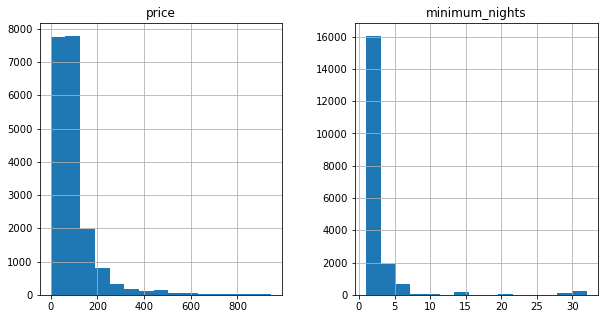

In [15]:
df_clean[['price', 'minimum_nights']].hist(bins=15, figsize=(10,5))

### In the previous comment, the data refers to the entire district of Lisbon. Analyzing only the data from the city of Lisbon, we have the following numbers.

In [16]:
df_clean[df_clean['neighbourhood_group'] == 'Lisboa'].describe()

,id,latitude,longitude,price,minimum_nights,number_of_reviews,availability_365
count,1.363300e+04,13633.000000,13633.000000,13633.000000,13633.000000,13633.000000,13633.000000
mean,2.551421e+07,38.720569,-9.143232,87.787648,3.029854,52.728453,217.694345
std,1.433297e+07,0.014868,0.017967,79.980090,4.438108,76.704991,126.780672
min,6.499000e+03,38.691930,-9.226790,0.000000,1.000000,0.000000,0.000000
25%,1.430046e+07,38.711210,-9.149950,48.000000,1.000000,2.000000,105.000000
50%,2.525373e+07,38.715690,-9.141210,69.000000,2.000000,19.000000,248.000000
75%,3.704647e+07,38.726220,-9.132820,100.000000,3.000000,75.000000,337.000000
max,5.093921e+07,38.792960,-9.092120,929.000000,31.000000,1294.000000,365.000000


array([[<AxesSubplot:title={'center':'price'}>,
        <AxesSubplot:title={'center':'minimum_nights'}>]], dtype=object)

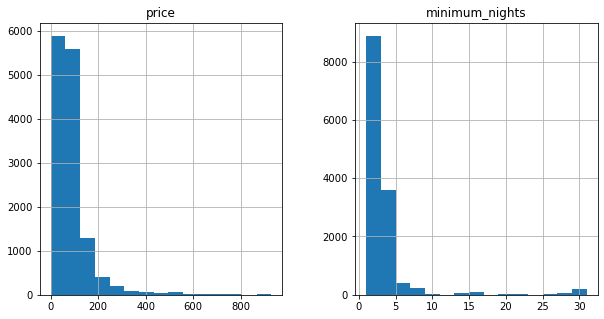

In [17]:
df_clean[df_clean['neighbourhood_group'] == 'Lisboa'][['price', 'minimum_nights']].hist(bins=15, figsize=(10,5))

# Question 2 -	What are the most common types of rent?

### First, we analyze again if there is any blank data. Then we need to group the data. We can see that the main type of rent is for entire houses and apartments.

In [18]:
df['room_type'].value_counts()

Entire home/apt    14484
Private room        4257
Hotel room           365
Shared room          352
Name: room_type, dtype: int64

### Below is the percentage of each group.

In [19]:
df['room_type'].value_counts() / df.shape[0]*100

Entire home/apt    74.437249
Private room       21.877891
Hotel room          1.875835
Shared room         1.809025
Name: room_type, dtype: float64

# Question 3 -	Is there any correlation between the price, the minimum number of nights and the number of reviews for each property?

### The best visual way to verify the existence of correlation is through a HeatMap. In this case, no statistically relevant values were found to indicate a correlation.

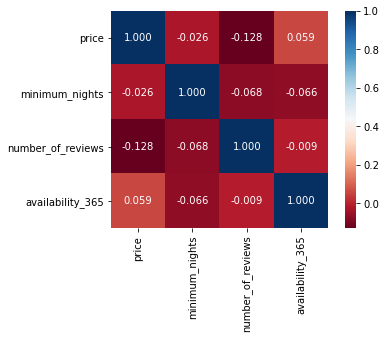

In [20]:
corr = df_clean.loc[:, ['price', 'minimum_nights', 'number_of_reviews', 'availability_365']].corr()
sns.heatmap(corr, cmap='RdBu', fmt='.3f', square=True, linecolor='white', annot=True);

# Question 4 - What is the average price for the most expensive and cheapest neighborhoods? 

### For the entire district of Lisbon, the neighborhoods with the highest average rent and the lowest average rent are:

In [21]:
df_clean.groupby(['neighbourhood'])['price'].mean().sort_values(ascending=False)[:10]

neighbourhood
Alguber               480.00
Ota                   465.00
Freiria               320.00
Cardosas              298.00
Vermelha              276.50
Aveiras de Baixo      274.50
Bucelas               243.70
Vale do Paraso        230.00
Azambuja              228.00
Carvoeira e Carmes    191.25
Name: price, dtype: float64

In [22]:
df_clean.groupby(['neighbourhood'])['price'].mean().sort_values()[:10]

neighbourhood
Pvoa de Santo Adrio e Olival de Basto    32.375000
Casal de Cambra                          33.500000
Mina de gua                              34.590909
Vila Franca de Xira                      36.214286
Encosta do Sol                           40.076923
Campelos e Outeiro da Cabea              40.800000
guas Livres                              40.863636
Ramalhal                                 41.428571
Falagueira-Venda Nova                    41.600000
Pontinha e Fames                         42.900000
Name: price, dtype: float64

### And just for the city of Lisbon:

In [23]:
df_clean[df_clean['neighbourhood_group'] == 'Lisboa'].groupby(['neighbourhood'])['price'].mean().sort_values(ascending=False)[:10]

neighbourhood
Parque das Naes           113.740260
Santa Maria Maior          97.844508
Misericrdia                96.979381
Santo Antnio               95.685637
Lumiar                     91.850000
So Domingos de Benfica     89.960938
Estrela                    85.629389
Marvila                    84.859155
So Vicente                 84.451521
Belm                       83.511278
Name: price, dtype: float64

In [24]:
df_clean[df_clean['neighbourhood_group'] == 'Lisboa'].groupby(['neighbourhood'])['price'].mean().sort_values()[:10]

neighbourhood
Beato             58.902439
Carnide           60.459459
Penha de Frana    62.051724
Benfica           62.600000
Areeiro           67.080808
Alvalade          67.712644
Alcntara          68.231760
Santa Clara       70.076923
Avenidas Novas    72.423019
Olivais           74.120567
Name: price, dtype: float64

### However, knowing the city of Lisbon, some of these indicated neighborhoods do not make sense to be on this list, especially the most expensive in the entire district. In this case, we may be faced with non-significant sampling compared to the entire DataSet.

### As can be seen below, several neighborhoods only appear once in the list, while others appear more than a thousand times. If neighborhoods are grouped by the number of times they appear in the DataSet, the average of values is 150 appearances. The problem occurs with the median, which separates 50% of the sample, where its value is 16, which indicates that many neighborhoods appear very rarely.

In [25]:
df_clean['neighbourhood'].value_counts()

Santa Maria Maior    3132
Misericrdia          2328
Arroios              1759
Cascais e Estoril    1261
Santo Antnio         1107
                     ... 
Cardosas                1
Alcoentre               1
Alguber                 1
Meca                    1
Vale do Paraso          1
Name: neighbourhood, Length: 128, dtype: int64

In [26]:
print(f"DataFrame neighbourhood quantity mean: {df_clean['neighbourhood'].value_counts().mean()}")
print(f"DataFrame neighbourhood quantity median: {df_clean['neighbourhood'].value_counts().median()}")

DataFrame neighbourhood quantity mean: 150.71875
DataFrame neighbourhood quantity median: 16.0


### If we calculate the Z-Score of this group, it can be seen that the first group is within an interval of seven standard deviations from the mean, while the second five. Only from the ninth item onwards the number of intervals is less than one.

In [27]:
quantity_group = df_clean['neighbourhood'].value_counts()
stats.zscore(quantity_group)

array([ 7.14363401,  5.21711945,  3.85370305,  2.66041417,  2.29140517,
        2.15961623,  1.48150228,  1.30658242,  1.24188604,  0.92080028,
        0.61169533,  0.55179127,  0.39124839,  0.3648906 ,  0.35051363,
        0.2762326 ,  0.26185562,  0.19715924,  0.19236691,  0.11089739,
        0.05818182,  0.05578566,  0.03661636,  0.00786241, -0.0232877 ,
       -0.04964549, -0.05443781, -0.05443781, -0.09517257, -0.12153036,
       -0.1574728 , -0.16466128, -0.16705745, -0.17184977, -0.19101907,
       -0.20539604, -0.21737686, -0.22216918, -0.23654616, -0.24852697,
       -0.25571546, -0.25571546, -0.26769627, -0.27248859, -0.27248859,
       -0.29165789, -0.29645022, -0.29884638, -0.29884638, -0.29884638,
       -0.3036387 , -0.30843103, -0.31082719, -0.31082719, -0.31322335,
       -0.31322335, -0.31561951, -0.31801568, -0.31801568, -0.31801568,
       -0.32041184, -0.32041184, -0.322808  , -0.322808  , -0.322808  ,
       -0.32520416, -0.32520416, -0.32760033, -0.32760033, -0.32

### In this case, using only the upper half of the set, using the median of 16 as a limit, we find these average prices for the District of Lisbon.

In [29]:
df_clean_by_mean = df_clean[df_clean.groupby("neighbourhood")['neighbourhood'].transform('size') > 16]
df_clean_by_mean.groupby(['neighbourhood'])['price'].mean().sort_values(ascending=False)[:10]

neighbourhood
Colares                         174.790026
Alcabideche                     164.759036
Ribamar                         162.470588
So Pedro da Cadeira             160.526316
Cascais e Estoril               143.934179
Reguengo Grande                 140.350000
So Joo das Lampas e Terrugem    139.117188
Santo Isidoro                   132.411168
Igreja Nova e Cheleiros         131.476190
A dos Cunhados e Maceira        129.582278
Name: price, dtype: float64

In [30]:
df_clean_by_mean.groupby(['neighbourhood'])['price'].mean().sort_values()[:10]

neighbourhood
Mina de gua            34.590909
guas Livres            40.863636
Pontinha e Fames       42.900000
Odivelas               53.297297
Moscavide e Portela    55.153846
Venteira               56.294118
Rio de Mouro           57.435897
Beato                  58.902439
Carnide                60.459459
Penha de Frana         62.051724
Name: price, dtype: float64

In [31]:
print(f"Original DataFrame entries: {len(df_clean)}")
print(f"DataFrame filtered by mean entries: {len(df_clean_by_mean)}")
print(f"Original entries - Filtered entries = {len(df_clean) - len(df_clean_by_mean)}")


Original DataFrame entries: 19292
DataFrame filtered by mean entries: 18853
Original entries - Filtered entries = 439


### And just for the city of Lisbon:

In [32]:
df_clean_by_mean[df_clean_by_mean['neighbourhood_group'] == 'Lisboa'].groupby(['neighbourhood'])['price'].mean().sort_values(ascending=False)[:10]

neighbourhood
Parque das Naes           113.740260
Santa Maria Maior          97.844508
Misericrdia                96.979381
Santo Antnio               95.685637
Lumiar                     91.850000
So Domingos de Benfica     89.960938
Estrela                    85.629389
Marvila                    84.859155
So Vicente                 84.451521
Belm                       83.511278
Name: price, dtype: float64

In [33]:
df_clean_by_mean[df_clean_by_mean['neighbourhood_group'] == 'Lisboa'].groupby(['neighbourhood'])['price'].mean().sort_values()[:10]

neighbourhood
Beato             58.902439
Carnide           60.459459
Penha de Frana    62.051724
Benfica           62.600000
Areeiro           67.080808
Alvalade          67.712644
Alcntara          68.231760
Santa Clara       70.076923
Avenidas Novas    72.423019
Olivais           74.120567
Name: price, dtype: float64

# Bonus - Overview

### Once we find the answer to our original questions, as a bonus, we can make a map with the location of all accommodations (since we have the geographic coordinates of each one), visualizing where there is a greater concentration by price.

### For the entire DataSet:

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

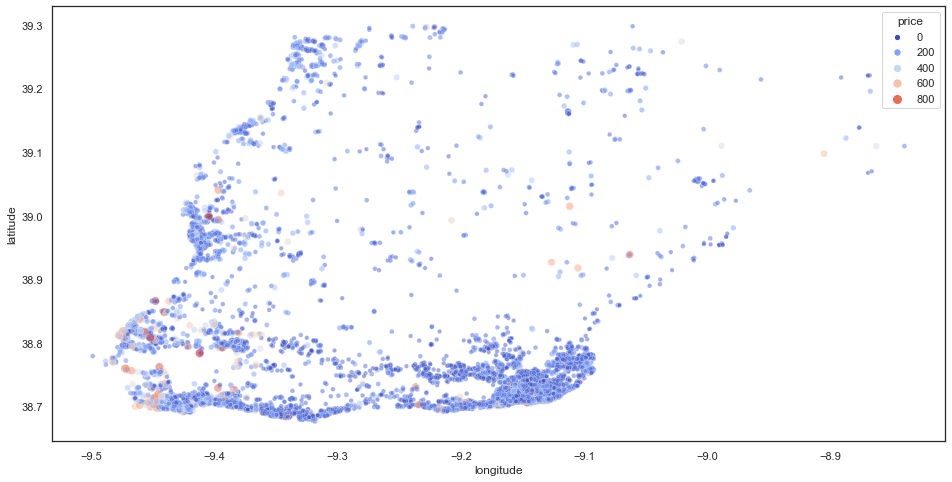

In [34]:
sns.set(rc={'figure.figsize':(16,8)})
sns.set_style("white")
sns.scatterplot(data=df_clean, x='longitude', y='latitude', 
    alpha=.5, hue=df_clean['price'], size=df_clean['price'], 
    palette="coolwarm",)

### For the DataSet divided by the median.

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

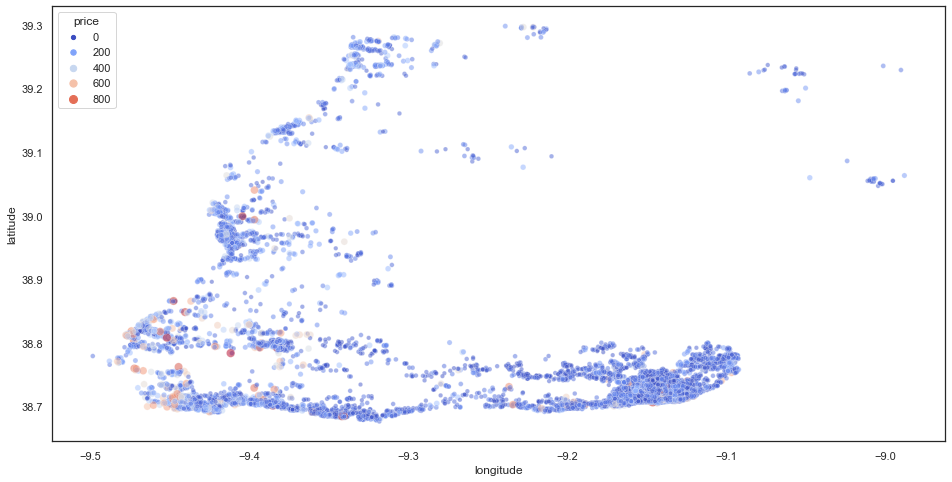

In [35]:
sns.set(rc={'figure.figsize':(16,8)})
sns.set_style("white")
sns.scatterplot(data=df_clean_by_mean, x='longitude', y='latitude', 
    alpha=.5, hue=df_clean_by_mean['price'], size=df_clean_by_mean['price'], 
    palette="coolwarm",)

### For all data from Lisbon.

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

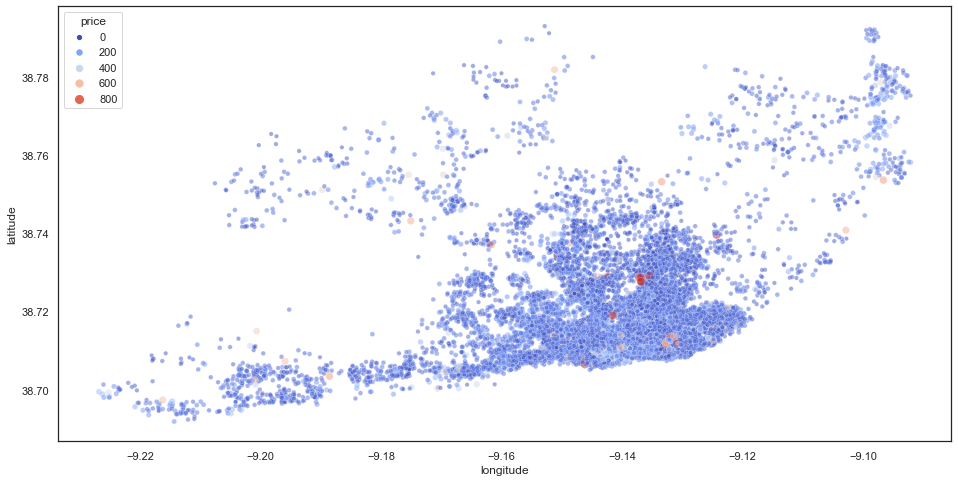

In [36]:
lisboa = df_clean[df_clean['neighbourhood_group'] == 'Lisboa']
sns.set(rc={'figure.figsize':(16,8)})
sns.set_style("white")
sns.scatterplot(data=lisboa, x='longitude', y='latitude', 
    alpha=.5, hue=lisboa['price'], size=lisboa['price'], 
    palette="coolwarm",)